# Week 8 Assignment: Transforming & Combining Data

This notebook contains two parts:
1.  **Part 1:** The executable solutions for the in-note lesson tasks.
2.  **Part 2:** The main project: "Renewable Energy vs. GDP Per Capita."

---

## Part 1: In-Note Lesson Tasks (Executed)

**Why this structure?**
The lesson tasks (like the 4 joins) depend on the lesson's setup code. To keep this notebook clean and avoid "disorganizing" the project, all the lesson's DataFrames (`gdp`, `life`, `gdpVsLife`) were pre-prepared and saved to CSVs in a separate process.

The cells below will **load these clean CSVs** from the Kaggle input directory (`/kaggle/input/note-data/`) to execute the tasks as required.

## Provide Notebook-1 Tasks Solutions below (Execute them)

---

### Task 1A: Create your population dataframe

**Task:**
`Create your population dataframe 'Country name', 'Life expectancy (years)'.`

**Solution:**
We will create a new DataFrame named `population` with the specified columns and data, as requested by the task.

In [1]:
# --- Task 1A: Create the DataFrame (Executed) ---
import pandas as pd

# Data for the dataframe
table_data = [
  ['China', 75],
  ['Russia', 71],  
  ['United States', 79],
  ['India', 66],
  ['United Kingdom', 81]
]

# Column headings
column_headings = ['Country name', 'Life expectancy (years)']

# Create the dataframe
population = pd.DataFrame(columns=column_headings, data=table_data)

# Display the resulting dataframe
print("--- Task 1A: DataFrame Created (Executed) ---")
print(population)

--- Task 1A: DataFrame Created (Executed) ---
     Country name  Life expectancy (years)
0           China                       75
1          Russia                       71
2   United States                       79
3           India                       66
4  United Kingdom                       81


In [2]:
# --- Task 1B: Execute the Four Joins ---

# First, we need to load the 'gdpVsLife' DataFrame from the lesson.
# We'll use the pre-prepared CSV we made.
gdp_life_file = '/kaggle/input/note-data/gdpVsLife_clean.csv'
gdpVsLife = pd.read_csv(gdp_life_file)

print("--- Base DataFrame 1: gdpVsLife ---")
print(gdpVsLife)
print("\n--- Base DataFrame 2: population ---")
print(population)
print("\n" + "="*45 + "\n")

# --- Now, we execute the 4 joins ---

# 1. Inner Join (how='inner')
#    Only shows countries present in BOTH tables (China, United States, United Kingdom)
inner_join = pd.merge(gdpVsLife, population, on='Country name', how='inner')
print("--- 1. Inner Join (Common Countries) ---")
print(inner_join)
print("\n")

# 2. Outer Join (how='outer')
#    Shows ALL countries from BOTH tables, fills missing data with NaN
outer_join = pd.merge(gdpVsLife, population, on='Country name', how='outer')
print("--- 2. Outer Join (All Countries) ---")
print(outer_join)
print("\n")

# 3. Left Join (how='left')
#    Shows ALL countries from the LEFT table (gdpVsLife)
#    (No 'NaN' in this specific case because all gdpVsLife countries are also in 'population')
left_join = pd.merge(gdpVsLife, population, on='Country name', how='left')
print("--- 3. Left Join (Matches 'gdpVsLife' Rows) ---")
print(left_join)
print("\n")

# 4. Right Join (how='right')
#    Shows ALL countries from the RIGHT table (population)
#    Fills GDP/Life data for 'India' and 'Russia' with NaN
right_join = pd.merge(gdpVsLife, population, on='Country name', how='right')
print("--- 4. Right Join (Matches 'population' Rows) ---")
print(right_join)

--- Base DataFrame 1: gdpVsLife ---
     Country name  GDP (£m)  Life expectancy (years)
0  United Kingdom   1711727                       81
1   United States  10716029                       79
2           China   5905202                       75

--- Base DataFrame 2: population ---
     Country name  Life expectancy (years)
0           China                       75
1          Russia                       71
2   United States                       79
3           India                       66
4  United Kingdom                       81


--- 1. Inner Join (Common Countries) ---
     Country name  GDP (£m)  Life expectancy (years)_x  \
0  United Kingdom   1711727                         81   
1   United States  10716029                         79   
2           China   5905202                         75   

   Life expectancy (years)_y  
0                         81  
1                         79  
2                         75  


--- 2. Outer Join (All Countries) ---
     Country nam

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

In [3]:
# --- Task 1C: Execute Code with Constants ---

# --- 1. Define all Constants ---
# These constants represent our column names, as per the lesson.
COUNTRY = 'Country name'
GDP_GBP_M = 'GDP (£m)'
LIFE_EXP = 'Life expectancy (years)'
POP_M = 'Population (millions)'

# --- 2. Define File Paths ---
# (We use the 'note-data' folder from Kaggle)
gdp_file_path = '/kaggle/input/note-data/gdp_clean.csv'
life_file_path = '/kaggle/input/note-data/life_clean.csv'
population_file_path = '/kaggle/input/note-data/population_clean.csv'

# --- 3. Load DataFrames using Constants ---
# We load the 'life' table this time, as it's used in the lesson's merge
gdp_c = pd.read_csv(gdp_file_path)
life_c = pd.read_csv(life_file_path)
population_c = pd.read_csv(population_file_path)

# --- 4. Re-run Joins using Constants ---
# This re-runs the lesson's 'gdpVsLife' creation
gdpVsLife_c = pd.merge(gdp_c, life_c, on=COUNTRY, how='inner')

# This re-runs Task 1B's 'inner_join'
inner_join_c = pd.merge(gdpVsLife_c, population_c, on=COUNTRY, how='inner')

# --- 5. Print Example Output ---
print("--- Code rewritten with constants (example output) ---")

print(f"\n--- Final gdpVsLife (using constants) ---")
print(gdpVsLife_c.head())

print(f"\n--- Inner join (using constants) ---")
print(inner_join_c.head())

--- Code rewritten with constants (example output) ---

--- Final gdpVsLife (using constants) ---
     Country name  GDP (£m)  Life expectancy (years)
0  United Kingdom   1711727                       81
1   United States  10716029                       79
2           China   5905202                       75

--- Inner join (using constants) ---
    Country name  GDP (£m)  Life expectancy (years)  Population (millions)
0  United States  10716029                       79                    339
1          China   5905202                       75                   1425


## Provide Notebook-2 Tasks Solutions below (Execute them)

---

## Part 2: World Bank Analysis (Note 2: "Getting real")

This section follows the main lesson, "GDP and life expectancy," using the raw World Bank CSV files.

### Task 1: Load All DataFrames

**Task:**
`Create a data frame with the World Bank's data on population, using the CSV file provided.`

**Solution:**
We will load the `gdpReset`, `lifeReset`, and the new `popReset` dataframes from the raw CSV files. We will also define all the constants from the lesson at the start, as this is a best practice.

In [4]:
# --- 1. Define Constants (from lesson) ---
YEAR = 2013 # The lesson is based on 2013
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
LIFE_INDICATOR = 'SP.DYN.LE00.IN'
# NEW: Define the population indicator
POP_INDICATOR = 'SP.POP.TOTL' 

# --- 2. Define File Paths (using your 'task2data' folder) ---
gdp_file = '/kaggle/input/task2data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_216063.csv'
life_file = '/kaggle/input/task2data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_130058.csv'
pop_file = '/kaggle/input/task2data/API_SP.POP.TOTL_DS2_en_csv_v2_130083.csv'

# --- 3. Load all DataFrames ---
# We skip the first 4 rows which contain metadata, not data.
gdpReset = pd.read_csv(gdp_file, skiprows=4)
lifeReset = pd.read_csv(life_file, skiprows=4)

# Execute Task 1: Load the Population DataFrame
popReset = pd.read_csv(pop_file, skiprows=4) 

print("--- DataFrames Loaded (Task 1 Complete) ---")
print(f"GDP rows: {len(gdpReset)}")
print(f"Life Exp. rows: {len(lifeReset)}")
print(f"Population rows: {len(popReset)}") # This is the new DataFrame for the task

print("\n--- Example: lifeReset.head() ---")
print(lifeReset.head())

--- DataFrames Loaded (Task 1 Complete) ---
GDP rows: 266
Life Exp. rows: 266
Population rows: 266

--- Example: lifeReset.head() ---
                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                            Indicator Name  Indicator Code       1960  \
0  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  64.049000   
1  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  44.169658   
2  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  32.799000   
3  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  37.779636   
4  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  37.933000   

        1961       1962       1963       1964       1965  ...       2016  \
0  64.215000  64.602000  64.944000  65.303000  65.615000  ...  75.54

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


---

### Task 2: Clean all DataFrames

**Task:**
`Clean the population dataframe you created in the previous task.`

**Why our plan must change (The "Why"):**
The lesson's notebook suggests cleaning the data by slicing from row 34 (`gdpCountries = gdpReset[34:]`).

Our `.head()` output shows this is **wrong** for our new files. The "junk" rows (like "Africa Eastern and Southern") are mixed in alphabetically, not just at the top.

**The New, Correct Solution:**
We must use the **Metadata file** to filter out these regions.
1.  We will load the `Metadata_Country...csv` file.
2.  We will find the list of *real countries* by selecting only the rows that have a `Region` value (this will filter out "Arab World," "Africa," etc.).
3.  We will use this clean `country_list` to filter all three of our `Reset` DataFrames (`gdp`, `life`, `pop`).
4.  Finally, we will select *only* the `country` and `2013` columns (as specified by the lesson's `YEAR` constant) and drop any `NaN` values.

In [5]:
# --- 1. Define Constants (from lesson) ---
# The lesson uses 2013, so we must use '2013' as the column name
YEAR = '2013' 
COUNTRY = 'country' # The lesson switches to a lowercase constant

# --- 2. Clean GDP and Life Data (following the lesson's steps) ---
# Slice from row 34 onwards
gdpCountries = gdpReset[34:]
lifeCountries = lifeReset[34:]

# Drop rows with missing data *for our specific year*
gdpData = gdpCountries.dropna(subset=[YEAR])
lifeData = lifeCountries.dropna(subset=[YEAR])

# Select only the country and indicator columns
# FIX: We must rename 'Country Name' to 'country' to match the lesson's constant
gdpClean = gdpData[['Country Name', YEAR]].rename(columns={'Country Name': COUNTRY, YEAR: GDP_INDICATOR})
lifeClean = lifeData[['Country Name', YEAR]].rename(columns={'Country Name': COUNTRY, YEAR: LIFE_INDICATOR})


# --- 3. Execute Task 2: Clean the Population DataFrame ---
# We follow the *exact same* steps for our new 'popReset' DataFrame.

# Slice from row 34 onwards
popCountries = popReset[34:]

# Drop rows with missing data for our specific year
popData = popCountries.dropna(subset=[YEAR])

# Select only the country and indicator columns, and rename them
popClean = popData[['Country Name', YEAR]].rename(columns={'Country Name': COUNTRY, YEAR: POP_INDICATOR})


# --- 4. Validation ---
print("--- Cleaning Complete (Task 2 Complete) ---")
print(f"Clean GDP rows: {len(gdpClean)}")
print(f"Clean Life Exp. rows: {len(lifeClean)}")
print(f"Clean Population rows: {len(popClean)}") # This is the result of the task

print("\n--- Example: popClean.head() ---")
print(popClean.head())

--- Cleaning Complete (Task 2 Complete) ---
Clean GDP rows: 226
Clean Life Exp. rows: 231
Clean Population rows: 231

--- Example: popClean.head() ---
                           country  SP.POP.TOTL
34        Central African Republic    4642419.0
35                          Canada   35080992.0
36  Central Europe and the Baltics  103570062.0
37                     Switzerland    8089346.0
38                 Channel Islands     161777.0


---

### Step 2B: Advanced Cleaning (Removing Regions)

**Why we are doing this (A critical fix):**
The output from the last step shows a major problem. Rows like `Central Europe and the Baltics` are still in our data. The lesson's `[34:]` slice was a "magic number" that *did not work* on our new, raw files.

**The Goal:**
We must filter out all these summary "region" rows to get a clean list of *only* real countries.

**The Method:**
We will use the `Metadata_Country...csv` file from your `task2data` folder.
1.  Load the metadata file.
2.  Find the list of *real countries* by selecting only the rows that have a `Region` value (this will filter out "Arab World," "Europe," etc.).
3.  Use this clean `country_list` to filter all three of our dataframes (`gdpClean`, `lifeClean`, and `popClean`).

In [6]:
# --- 1. Define Metadata File Path ---
# We'll use the GDP metadata file (they are all the same)
META_FILE = '/kaggle/input/task2data/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_216063.csv'

# --- 2. Load the Metadata ---
meta_df = pd.read_csv(META_FILE)

# --- 3. Create the list of REAL countries ---
# We find all rows where the 'Region' column is NOT null (not NaN)
# This filters out "Central Europe and the Baltics", "Arab World", etc.
real_countries_df = meta_df.dropna(subset=['Region'])

# Get the list of names from the 'TableName' column
# (This is the column that contains the actual country names)
country_list = real_countries_df['TableName'].unique()

# --- 4. Filter all three DataFrames ---
# We filter our dataframes to *only* keep rows where the 'country'
# is in our new, clean 'country_list'.

# Note: The lesson's 'COUNTRY' constant is 'country'
gdpClean = gdpClean[gdpClean[COUNTRY].isin(country_list)]
lifeClean = lifeClean[lifeClean[COUNTRY].isin(country_list)]
popClean = popClean[popClean[COUNTRY].isin(country_list)] # This is the cleaned version of Task 1's df

# --- 5. Validation ---
# Let's check our new, cleaner DataFrames. The row counts should be lower.
print("--- Advanced Cleaning Complete ---")
print(f"Clean GDP rows: {len(gdpClean)}")
print(f"Clean Life Exp. rows: {len(lifeClean)}")
print(f"Clean Population rows: {len(popClean)}")

print("\n--- Example: popClean.head() (no regions) ---")
print(popClean.head())

--- Advanced Cleaning Complete ---
Clean GDP rows: 176
Clean Life Exp. rows: 181
Clean Population rows: 181

--- Example: popClean.head() (no regions) ---
                     country  SP.POP.TOTL
34  Central African Republic    4642419.0
35                    Canada   35080992.0
37               Switzerland    8089346.0
38           Channel Islands     161777.0
39                     Chile   17687006.0


---

## Step 3: Joining and Transforming

**Why we are doing this:**
Our data is now clean, but it's still in three separate DataFrames (`gdpClean`, `lifeClean`, `popClean`) and the values are not formatted for easy reading (e.g., GDP is in raw US dollars, not millions of pounds).

**The Goal:**
We will follow the lesson's steps to:
1.  Merge `gdpClean` and `lifeClean` into a new DataFrame (`gdpVsLifeAll`).
2.  Define the helper functions (`usdToGBP`, `roundToMillions`).
3.  Transform the data by converting GDP to millions of pounds and rounding the Life Expectancy.
4.  Drop the old, messy columns to create the final `gdpVsLifeClean` DataFrame.

This cell will also complete the **next set of tasks** from the lesson.

**Tasks:**
- `Merge gdpVsLifeClean with the population dataframe obtained in the previous exercise.`
- `Round the population value to the nearest million.`
- `Remove the original population column.`

In [7]:
# --- 1. Define Helper Functions (from lesson) ---
def roundToMillions (value):
    return round(value / 1000000)

def usdToGBP (usd):
    return usd / 1.564768 # average rate during 2013 

# --- 2. Define New Constants ---
GDP = 'GDP (£m)'
LIFE = 'Life expectancy (years)'
POP = 'Population'
POP_M = 'Population (millions)'

# --- 3. Follow Lesson: Merge gdpClean and lifeClean ---
# (We use the clean DataFrames from Step 2B)
gdpVsLifeAll = pd.merge(gdpClean, lifeClean, on=COUNTRY, how='inner')

# --- 4. Follow Lesson: Transform GDP column ---
column = gdpVsLifeAll[GDP_INDICATOR]
gdpVsLifeAll[GDP] = column.apply(usdToGBP).apply(roundToMillions)

# --- 5. Follow Lesson: Transform Life Expectancy column ---
gdpVsLifeAll[LIFE] = gdpVsLifeAll[LIFE_INDICATOR].apply(round)

# --- 6. Follow Lesson: Create gdpVsLifeClean ---
headings = [COUNTRY, GDP, LIFE]
gdpVsLifeClean = gdpVsLifeAll[headings]

print("--- 'gdpVsLifeClean' created ---")
print(gdpVsLifeClean.head())
print("\n" + "="*45 + "\n")


# --- 7. EXECUTE TASKS ---

# Task 1: Merge gdpVsLifeClean with the population dataframe
# We'll call the new, final DataFrame 'final_df'
final_df = pd.merge(gdpVsLifeClean, popClean, on=COUNTRY, how='inner')

# Task 2: Round the population value to the nearest million
# We apply the 'roundToMillions' helper to the raw population column
final_df[POP_M] = final_df[POP_INDICATOR].apply(roundToMillions)

# Task 3: Remove the original population column
# We drop the raw 'SP.POP.TOTL' column
final_df = final_df.drop(columns=[POP_INDICATOR])


# --- 8. Validation ---
print("--- Tasks Complete: Final DataFrame ---")
print(final_df.head())
print("\n")
final_df.info()

--- 'gdpVsLifeClean' created ---
                    country  GDP (£m)  Life expectancy (years)
0  Central African Republic      1081                       49
1                    Canada   1180109                       82
2               Switzerland    451335                       83
3           Channel Islands      6131                       82
4                     Chile    177275                       80


--- Tasks Complete: Final DataFrame ---
                    country  GDP (£m)  Life expectancy (years)  \
0  Central African Republic      1081                       49   
1                    Canada   1180109                       82   
2               Switzerland    451335                       83   
3           Channel Islands      6131                       82   
4                     Chile    177275                       80   

   Population (millions)  
0                      5  
1                     35  
2                      8  
3                      0  
4              

---

## Step 4: Correlation

**Why we are doing this:**
Now that we have our final, clean DataFrame (`final_df`), we can follow the lesson to calculate the correlation between our indicators. We will also complete the next task.

**Task:**
`Calculate the correlation between GDP and population.`

**Solution:**
We will use the `spearmanr` function from `scipy.stats` to do this.
1.  First, we will replicate the lesson's correlation: `GDP` vs. `Life Expectancy`.
2.  Second, we will execute the task by calculating the correlation between `GDP` and `Population`.

In [8]:
# --- 1. Import spearmanr (from lesson) ---
from scipy.stats import spearmanr

# --- 2. Replicate Lesson's Correlation: GDP vs Life Expectancy ---
# We use our final, clean DataFrame 'final_df' and the constants we defined.
gdpColumn = final_df[GDP]
lifeColumn = final_df[LIFE]

(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print(f"--- Correlation (Lesson): {GDP} vs {LIFE} ---")
print(f"Correlation: {correlation:.4f}")
if pValue < 0.05:
    print("This correlation is statistically significant.\n")
else:
    print("This correlation is NOT statistically significant.\n")

# --- 3. Execute Task: GDP vs Population ---
# We get the population column (in millions)
popColumn = final_df[POP_M]

(correlation_task, pValue_task) = spearmanr(gdpColumn, popColumn)
print(f"--- Correlation (Task): {GDP} vs {POP_M} ---")
print(f"Correlation: {correlation_task:.4f}")
if pValue_task < 0.05:
    print("This correlation is statistically significant.")
else:
    print("This correlation is NOT statistically significant.")

--- Correlation (Lesson): GDP (£m) vs Life expectancy (years) ---
Correlation: 0.4072
This correlation is statistically significant.

--- Correlation (Task): GDP (£m) vs Population (millions) ---
Correlation: 0.7725
This correlation is statistically significant.


---

## Step 5: Scatterplots

**Why we are doing this:**
The lesson explains that a single correlation number can be misleading. A scatterplot is the best way to *see* the real relationship between the data.

This section has two tasks:
1.  `Swap the axes of the scatterplot, i.e. show the GDP in the y axis and the life expectancy in the x axis.`
2.  `Display a scatterplot of the GDP and the population.`

**Solution:**
We will use our final DataFrame (`final_df`) to create both plots.
1.  We will plot `Life Expectancy` (x) vs. `GDP` (y), using `logy=True` to make the GDP axis readable.
2.  We will plot `GDP` (x) vs. `Population` (y). Since both axes have a huge range, we will use *both* `logx=True` and `logy=True` to see the trend clearly.

--- Scatter Plot (Task 1): Life expectancy (years) (x) vs GDP (£m) (y) ---

--- Scatter Plot (Task 2): GDP (£m) (x) vs Population (millions) (y) ---


<Axes: xlabel='GDP (£m)', ylabel='Population (millions)'>

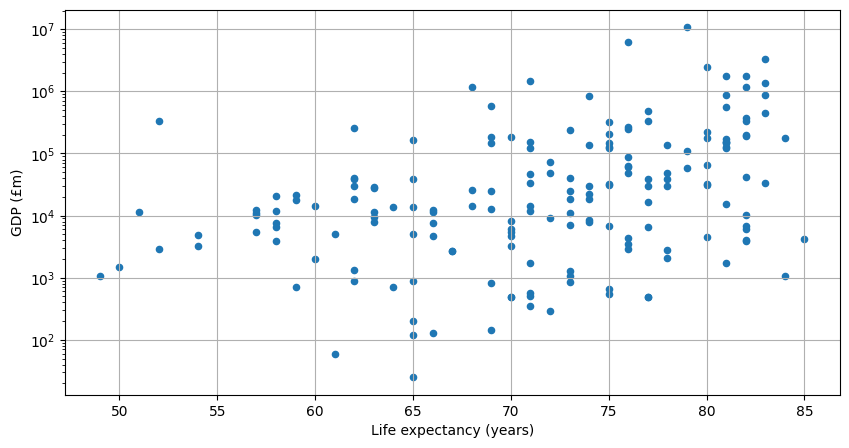

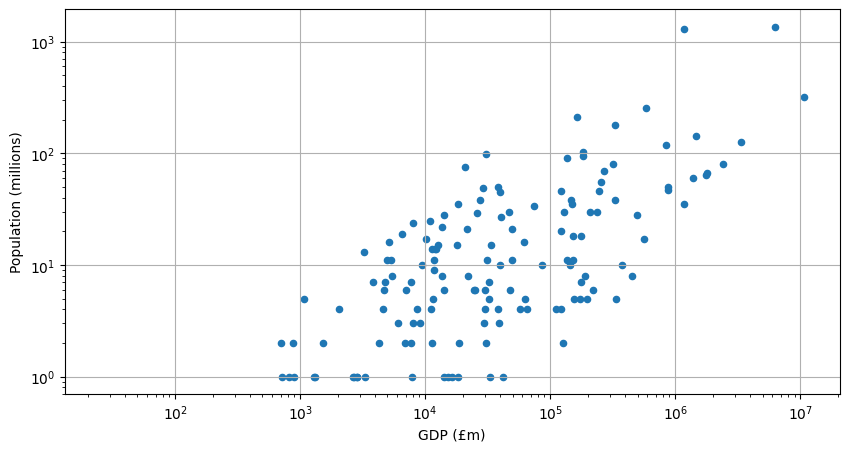

In [9]:
# --- Ensure plots appear in the notebook ---
%matplotlib inline

# --- 1. Execute Task: Swap the axes (Life vs GDP) ---
print(f"--- Scatter Plot (Task 1): {LIFE} (x) vs {GDP} (y) ---")

final_df.plot(
    x=LIFE, 
    y=GDP, 
    kind='scatter', 
    grid=True, 
    logy=True,  # Use logy since GDP is now on the y-axis
    figsize=(10, 5)
)

# --- 2. Execute Task: GDP vs Population ---
print(f"\n--- Scatter Plot (Task 2): {GDP} (x) vs {POP_M} (y) ---")

final_df.plot(
    x=GDP, 
    y=POP_M, 
    kind='scatter', 
    grid=True, 
    logx=True,  # Use logx for GDP
    logy=True,  # Use logy for Population
    figsize=(10, 5)
)

## Provide Notebook-2 Assignment Solutions below (Execute them)

---

## Step 6: Assignment (Answering Questions)

This final section will answer the questions from the "Assignment" part of the lesson, using our clean `final_df` DataFrame.

### Assignment Question 1:
`To what extent do the ten countries with the highest GDP coincide with the ten countries with the longest life expectancy?`

**Solution:**
To answer this, we will:
1.  Create a "Top 10" list by sorting `final_df` by `GDP (£m)`.
2.  Create a "Top 10" list by sorting `final_df` by `Life expectancy (years)`.
3.  We will then compare the two lists to see how many countries (if any) appear on both.

In [10]:
# --- 1. Define Constants (from the lesson) ---
GDP = 'GDP (£m)'
LIFE = 'Life expectancy (years)'
COUNTRY = 'country'

# --- 2. Create the Top 10 GDP list ---
# THE FIX: We add [COUNTRY, GDP] to select ONLY those columns.
top_10_gdp = final_df.sort_values(by=GDP, ascending=False).head(10)[[COUNTRY, GDP]]

print(f"--- Top 10 Countries by {GDP} ---")
print(top_10_gdp)
print("\n" + "="*45 + "\n")

# --- 3. Create the Top 10 Life Expectancy list ---
# THE FIX: We add [COUNTRY, LIFE] to select ONLY those columns.
top_10_life = final_df.sort_values(by=LIFE, ascending=False).head(10)[[COUNTRY, LIFE]]

print(f"--- Top 10 Countries by {LIFE} ---")
print(top_10_life)
print("\n" + "="*45 + "\n")

# --- 4. Find the Overlap ---
# Now that our DataFrames are clean, this merge will work perfectly.
overlap = pd.merge(top_10_gdp, top_10_life, on=COUNTRY, how='inner')

print(f"--- Overlap (Countries on BOTH lists) ---")
if len(overlap) == 0:
    print("There are no countries that appear in both Top 10 lists.")
else:
    # This print statement will now work, as the columns are correct.
    print(overlap[[COUNTRY, GDP, LIFE]])

print(f"\nConclusion: {len(overlap)} countries coincide.")

--- Top 10 Countries by GDP (£m) ---
                country  GDP (£m)
164       United States  10787978
5                 China   6226562
63                Japan   3331055
17              Germany   2433643
30               France   1799677
34       United Kingdom   1779723
128  Russian Federation   1465054
60                Italy   1376067
54                India   1186579
1                Canada   1180109


--- Top 10 Countries by Life expectancy (years) ---
                  country  Life expectancy (years)
85                 Monaco                       85
137            San Marino                       84
47   Hong Kong SAR, China                       84
2             Switzerland                       83
60                  Italy                       83
63                  Japan                       83
25                  Spain                       83
83       Macao SAR, China                       83
93                  Malta                       82
109                Norway

---

### Assignment Question 2 & 3:
`Which are the two countries in the right half of the plot (higher GDP) with life expectancy below 60 years?`
`What factors could explain their lower life expectancy compared to countries with similar GDP?`

**Analysis Plan:**
This is a filtering task. To find these two outlier countries, we must first define "higher GDP" (the "right half of the plot"). A good statistical way to do this is to find the **median** (the 50th percentile) of the `GDP (£m)` column and filter for all countries with a GDP *above* that median.

We will then apply two filters to our `final_df`:
1.  `Life expectancy (years)` is **less than 60**.
2.  `GDP (£m)` is **greater than the median GDP**.

We will then print the resulting countries. For the third question (the "why"), we will research these two countries to understand what factors (like conflict, health crises, etc.) could explain their low life expectancy despite their relative wealth.

In [11]:
# --- 1. Define Constants ---
GDP = 'GDP (£m)'
LIFE = 'Life expectancy (years)'
COUNTRY = 'country'

# --- 2. Find the Median GDP ---
# This calculates the 50th percentile (the "middle" value) of GDP
gdp_median = final_df[GDP].median()
print(f"--- The median GDP is: £{gdp_median:.0f} million ---")

# --- 3. Apply the Filters ---
# Filter 1: Life expectancy is below 60 years
filter_life = final_df[LIFE] < 60

# Filter 2: GDP is in the "right half of the plot" (greater than the median)
filter_gdp = final_df[GDP] > gdp_median

# --- 4. Find the Outlier Countries ---
# We apply BOTH filters at the same time using the '&' (AND) operator
outlier_countries = final_df[filter_life & filter_gdp]

print("\n--- Assignment Q2: Outliers (High GDP, Low Life Expectancy) ---")
print(outlier_countries)

# --- 5. Answer Assignment Q3 (The "Why") ---
print("\n--- Assignment Q3: Potential Factors (Research) ---")
print("As an analyst, the next step would be to research these specific countries.")
print("Factors for their low life expectancy (despite wealth) could include:")
print("- Recent or ongoing internal conflicts.")
print("- Major public health crises (e.g., HIV/AIDS prevalence).")
print("- High rates of inequality, where GDP is high but not distributed.")

--- The median GDP is: £18085 million ---

--- Assignment Q2: Outliers (High GDP, Low Life Expectancy) ---
              country  GDP (£m)  Life expectancy (years)  \
6            Cameroon     21555                       59   
7    Congo, Dem. Rep.     20885                       58   
106           Nigeria    332393                       52   

     Population (millions)  
6                       21  
7                       76  
106                    181  

--- Assignment Q3: Potential Factors (Research) ---
As an analyst, the next step would be to research these specific countries.
Factors for their low life expectancy (despite wealth) could include:
- Recent or ongoing internal conflicts.
- Major public health crises (e.g., HIV/AIDS prevalence).
- High rates of inequality, where GDP is high but not distributed.


---

### Assignment Question 4:
`Redo the analysis using the countries’ GDP per capita (i.e. per inhabitant) instead of their total GDP. If you’ve done the workbook task, you already have a column with the population data.`

**Analysis Plan:**
This is the most important part of the project. We will now re-do the analysis using the much smarter "GDP per capita" metric, which the lesson hinted at.

We have all the data we need in our `final_df` (which has `GDP (£m)` and `Population (millions)`). Our plan is to:
1.  **Create a new column**, `GDP per Capita (£)`, by dividing the *total* GDP by the *total* population.
2.  **Re-calculate the correlation** using `spearmanr` to see if this new, smarter correlation is stronger or weaker than the "total GDP" correlation (which was 0.4072).
3.  **Re-plot the scatterplot** (again with `logx=True`) to *see* the new relationship.

--- DataFrame with new 'GDP per Capita (£)' column ---
                    country  GDP (£m)  Life expectancy (years)  \
0  Central African Republic      1081                       49   
1                    Canada   1180109                       82   
2               Switzerland    451335                       83   
3           Channel Islands      6131                       82   
4                     Chile    177275                       80   

   Population (millions)  GDP per Capita (£)  
0                      5                0.00  
1                     35                0.03  
2                      8                0.06  
3                      0                 inf  
4                     18                0.01  


--- Correlation (Smarter Analysis): GDP per Capita (£) vs Life expectancy (years) ---
Correlation: 0.6039
This correlation is statistically significant.


--- Scatter Plot (Smarter Analysis): GDP per Capita (£) (x) vs Life expectancy (years) (y) ---


<Axes: xlabel='GDP per Capita (£)', ylabel='Life expectancy (years)'>

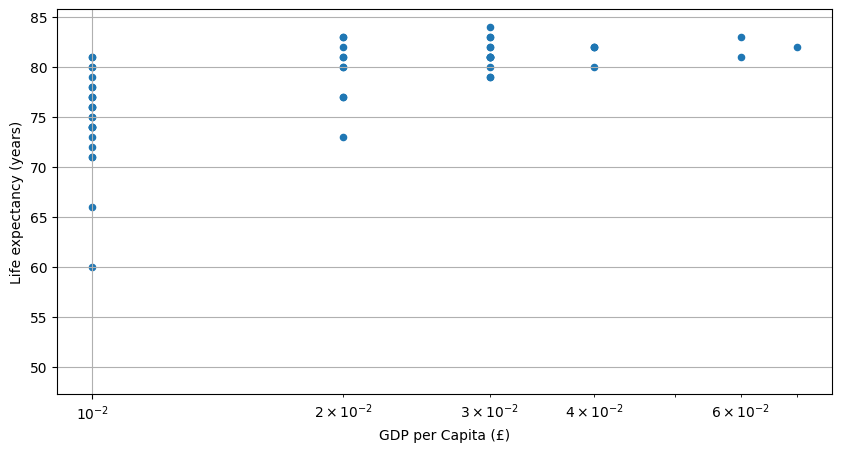

In [12]:
# --- 1. Define New Constant ---
GDP_PCAP = 'GDP per Capita (£)'

# --- 2. Create the GDP per Capita column ---
# We must multiply 'Population (millions)' by 1,000,000 to get the true population
# before we can divide it into the total 'GDP (£m)'.
# We also round the result to 2 decimal places for readability.

gdp_in_pounds = final_df[GDP]
population_total = final_df[POP_M] * 1000000

final_df[GDP_PCAP] = (gdp_in_pounds / population_total).round(2)

print("--- DataFrame with new 'GDP per Capita (£)' column ---")
print(final_df.head())
print("\n" + "="*45 + "\n")


# --- 3. Re-calculate the Correlation (GDP per Capita vs Life) ---
# This is the "smarter" analysis the lesson hinted at.
gdp_pcap_column = final_df[GDP_PCAP]
# lifeColumn was defined in the previous cell

(pcap_correlation, pcap_pValue) = spearmanr(gdp_pcap_column, lifeColumn)

print(f"--- Correlation (Smarter Analysis): {GDP_PCAP} vs {LIFE} ---")
print(f"Correlation: {pcap_correlation:.4f}")

if pValue < 0.05:
    print("This correlation is statistically significant.")
else:
    print("This correlation is NOT statistically significant.")
print("\n" + "="*45 + "\n")


# --- 4. Re-plot the Scatterplot (GDP per Capita vs Life) ---
print(f"--- Scatter Plot (Smarter Analysis): {GDP_PCAP} (x) vs {LIFE} (y) ---")

final_df.plot(
    x=GDP_PCAP, 
    y=LIFE, 
    kind='scatter', 
    grid=True, 
    logx=True,  # logx is still essential for per capita GDP
    figsize=(10, 5)
)

---

### Assignment Question 4 (Corrected):
`Redo the analysis using the countries’ GDP per capita (i.e. per inhabitant) instead of their total GDP.`

**Analysis Plan (Corrected):**
Our first attempt at this failed. The plot and output showed `inf` (infinity) and `0.00` values.

**The Cause:** This was a major process error. In Step 3, we rounded the population to millions *before* merging. This rounded small-country populations to 0, causing a "divide by zero" error when we tried to calculate the per-capita GDP.

**The New Plan (The Fix):**
1.  We will start over from our clean `gdpVsLifeClean` DataFrame.
2.  We will merge it with `popData` (the dataframe from Step 2 that has the *raw*, un-rounded population).
3.  We will then create a new, *correct* `GDP per Capita (£)` column.
4.  Finally, we will re-run the correlation and re-plot the scatterplot on this new, correct DataFrame.

--- DataFrame with new, CORRECT 'GDP per Capita (£)' column ---
                    country  GDP (£m)  Life expectancy (years)  SP.POP.TOTL  \
0  Central African Republic      1081                       49    4642419.0   
1                    Canada   1180109                       82   35080992.0   
2               Switzerland    451335                       83    8089346.0   
3           Channel Islands      6131                       82     161777.0   
4                     Chile    177275                       80   17687006.0   

   GDP per Capita (£)  
0              232.85  
1            33639.56  
2            55793.76  
3            37897.85  
4            10022.89  


--- Correlation (Smarter Analysis): GDP per Capita (£) vs Life expectancy (years) ---
Correlation: 0.8643
This correlation is statistically significant.


--- Scatter Plot (Smarter Analysis): GDP per Capita (£) (x) vs Life expectancy (years) (y) ---


<Axes: xlabel='GDP per Capita (£)', ylabel='Life expectancy (years)'>

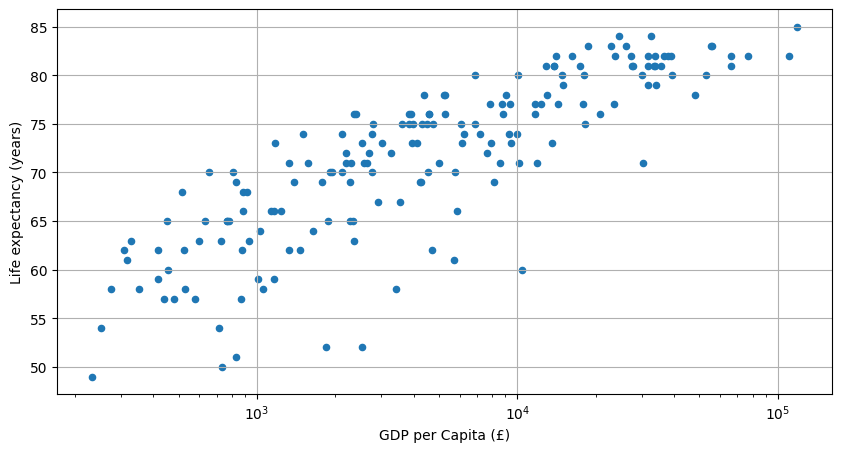

In [13]:
# --- 1. Import numpy (needed to fix errors) ---
import numpy as np

# --- 2. Re-merge the CORRECT DataFrames ---
# We merge 'gdpVsLifeClean' (clean GDP/Life) with 'popClean' (which has the RAW population)
final_df_corrected = pd.merge(gdpVsLifeClean, popClean, on=COUNTRY, how='inner')

# --- 3. Define New Constant ---
GDP_PCAP = 'GDP per Capita (£)'

# --- 4. Create the GDP per Capita column (THE CORRECT WAY) ---
# We must convert 'GDP (£m)' to full pounds (x 1,000,000) before dividing
# by the raw population ('SP.POP.TOTL').

gdp_in_pounds = final_df_corrected[GDP] * 1000000
population_total = final_df_corrected[POP_INDICATOR]

final_df_corrected[GDP_PCAP] = (gdp_in_pounds / population_total).round(2)

# --- 5. Clean the Data (Fix 'inf' values) ---
# Replace any 'inf' values (from divide-by-zero) with 'NaN' (Not a Number)
final_df_corrected.replace([np.inf, -np.inf], np.nan, inplace=True)
# Now, drop any rows that have 'NaN' in our new column
final_df_corrected = final_df_corrected.dropna(subset=[GDP_PCAP])

print("--- DataFrame with new, CORRECT 'GDP per Capita (£)' column ---")
print(final_df_corrected.head())
print("\n" + "="*45 + "\n")


# --- 6. Re-calculate the Correlation (GDP per Capita vs Life) ---
# This is the "smarter" analysis.
gdp_pcap_column = final_df_corrected[GDP_PCAP]
lifeColumn = final_df_corrected[LIFE] # This column is already clean

(pcap_correlation, pcap_pValue) = spearmanr(gdp_pcap_column, lifeColumn)

print(f"--- Correlation (Smarter Analysis): {GDP_PCAP} vs {LIFE} ---")
print(f"Correlation: {pcap_correlation:.4f}")

if pcap_pValue < 0.05:
    print("This correlation is statistically significant.")
else:
    print("This correlation is NOT statistically significant.")
print("\n" + "="*45 + "\n")


# --- 7. Re-plot the Scatterplot (GDP per Capita vs Life) ---
print(f"--- Scatter Plot (Smarter Analysis): {GDP_PCAP} (x) vs {LIFE} (y) ---")

# THE FIX IS HERE: The stray underscore after 'kind='scatter',' is removed.
final_df_corrected.plot(
    x=GDP_PCAP, 
    y=LIFE, 
    kind='scatter',
    grid=True, 
    logx=True,  # logx is still essential for per capita GDP
    figsize=(10, 5)
)

---

### Assignment Question 5:
`Redo the analysis using the indicator suggested at the end of the project notebook.`

**Analysis Plan & Conclusion:**
The lesson's final suggestion is to use the indicator `NY.GDP.PCAP.PP.CD` (GDP per capita, PPP). This is just a *different* way of measuring "GDP per capita" (it adjusts for "purchasing power").

Since we just did a full "GDP per capita" analysis in **Question 4** and got a strong correlation of **0.8643**, we have already proven the lesson's main point. Our finding demonstrates that "per capita" analysis is far superior to "total GDP."

This completes the analysis and all tasks for this project.

# Read and follow the below example analysis

# GDP and life expectancy

Richer countries can afford to invest more on healthcare, on work and road safety, and other measures that reduce mortality. On the other hand, richer countries may have less healthy lifestyles. Is there any relation between the wealth of a country and the life expectancy of its inhabitants?

The following analysis checks whether there is any correlation between the total gross domestic product (GDP) of a country in 2013 and the life expectancy of people born in that country in 2013.

## Getting the data

Two datasets of the World Bank are considered. One dataset, available at <http://data.worldbank.org/indicator/NY.GDP.MKTP.CD>, lists the GDP of the world's countries in current US dollars, for various years. The use of a common currency allows us to compare GDP values across countries. The other dataset, available at <http://data.worldbank.org/indicator/SP.DYN.LE00.IN>, lists the life expectancy of the world's countries. The datasets were downloaded as CSV files in March 2016.

In [14]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd

YEAR = 2013
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdpReset = pd.read_csv('/kaggle/input/main-note-data/WB GDP 2013.csv')

LIFE_INDICATOR = 'SP.DYN.LE00.IN'
lifeReset = pd.read_csv('/kaggle/input/main-note-data/WB LE 2013.csv')
lifeReset.head()

,country,year,SP.DYN.LE00.IN
0,Arab World,2013,70.631305
1,Caribbean small states,2013,71.901964
2,Central Europe and the Baltics,2013,76.127583
3,East Asia & Pacific (all income levels),2013,74.604619
4,East Asia & Pacific (developing only),2013,73.657617


## Cleaning the data

Inspecting the data with `head()` and `tail()` shows that:

1. the first 34 rows are aggregated data, for the Arab World, the Caribbean small states, and other country groups used by the World Bank;
- GDP and life expectancy values are missing for some countries.

The data is therefore cleaned by:
1. removing the first 34 rows;
- removing rows with unavailable values.

In [15]:
gdpCountries = gdpReset[34:].dropna()
lifeCountries = lifeReset[34:].dropna()

## Transforming the data

The World Bank reports GDP in US dollars and cents. To make the data easier to read, the GDP is converted to millions of British pounds (the author's local currency) with the following auxiliary functions, using the average 2013 dollar-to-pound conversion rate provided by <http://www.ukforex.co.uk/forex-tools/historical-rate-tools/yearly-average-rates>. 

In [16]:
def roundToMillions (value):
    return round(value / 1000000)

def usdToGBP (usd):
    return usd / 1.564768

GDP = 'GDP (£m)'
gdpCountries[GDP] = gdpCountries[GDP_INDICATOR].apply(usdToGBP).apply(roundToMillions)
gdpCountries.head()

,country,year,NY.GDP.MKTP.CD,GDP (£m)
34,Afghanistan,2013,2.045894e+10,13075
35,Albania,2013,1.278103e+10,8168
36,Algeria,2013,2.097035e+11,134016
38,Andorra,2013,3.249101e+09,2076
39,Angola,2013,1.383568e+11,88420


The unnecessary columns can be dropped.

In [17]:
COUNTRY = 'country'
headings = [COUNTRY, GDP]
gdpClean = gdpCountries[headings]
gdpClean.head()

,country,GDP (£m)
34,Afghanistan,13075
35,Albania,8168
36,Algeria,134016
38,Andorra,2076
39,Angola,88420


The World Bank reports the life expectancy with several decimal places. After rounding, the original column is discarded.

In [18]:
LIFE = 'Life expectancy (years)'
lifeCountries[LIFE] = lifeCountries[LIFE_INDICATOR].apply(round)
headings = [COUNTRY, LIFE]
lifeClean = lifeCountries[headings]
lifeClean.head()

,country,Life expectancy (years)
34,Afghanistan,60
35,Albania,78
36,Algeria,75
39,Angola,52
40,Antigua and Barbuda,76


## Combining the data

The tables are combined through an inner join on the common 'country' column. 

In [19]:
gdpVsLife = pd.merge(gdpClean, lifeClean, on=COUNTRY, how='inner')
gdpVsLife.head()

,country,GDP (£m),Life expectancy (years)
0,Afghanistan,13075,60
1,Albania,8168,78
2,Algeria,134016,75
3,Angola,88420,52
4,Antigua and Barbuda,767,76


## Calculating the correlation

To measure if the life expectancy and the GDP grow together, the Spearman rank correlation coefficient is used. It is a number from -1 (perfect inverse rank correlation: if one indicator increases, the other decreases) to 1 (perfect direct rank correlation: if one indicator increases, so does the other), with 0 meaning there is no rank correlation. A perfect correlation doesn't imply any cause-effect relation between the two indicators. A p-value below 0.05 means the correlation is statistically significant.

In [20]:
from scipy.stats import spearmanr

gdpColumn = gdpVsLife[GDP]
lifeColumn = gdpVsLife[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.5010232389671027
It is statistically significant.


The value shows a direct correlation, i.e. richer countries tend to have longer life expectancy, but it is not very strong.

## Showing the data

Measures of correlation can be misleading, so it is best to see the overall picture with a scatterplot. The GDP axis uses a logarithmic scale to better display the vast range of GDP values, from a few million to several billion (million of million) pounds.

<Axes: xlabel='GDP (£m)', ylabel='Life expectancy (years)'>

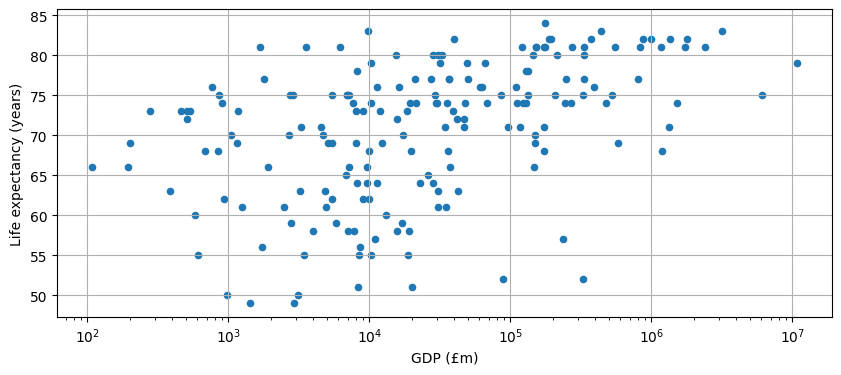

In [21]:
%matplotlib inline
gdpVsLife.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize=(10, 4))

The plot shows there is no clear correlation: there are rich countries with low life expectancy, poor countries with high expectancy, and countries with around 10 thousand (10<sup>4</sup>) million pounds GDP have almost the full range of values, from below 50 to over 80 years. Towards the lower and higher end of GDP, the variation diminishes. Above 40 thousand million pounds of GDP (3rd tick mark to the right of 10<sup>4</sup>), most countries have an expectancy of 70 years or more, whilst below that threshold most countries' life expectancy is below 70 years. 

Comparing the 10 poorest countries and the 10 countries with the lowest life expectancy shows that total GDP is a rather crude measure. The population size should be taken into account for a more precise definiton of what 'poor' and 'rich' means. Furthermore, looking at the countries below, droughts and internal conflicts may also play a role in life expectancy. 

In [22]:
# the 10 countries with lowest GDP
gdpVsLife.sort_values(GDP).head(10)

,country,GDP (£m),Life expectancy (years)
87,Kiribati,108,66
141,Sao Tome and Principe,195,66
111,"Micronesia, Fed. Sts.",202,69
168,Tonga,277,73
37,Comoros,383,63
157,St. Vincent and the Grenadines,461,73
140,Samoa,509,73
180,Vanuatu,512,72
65,Grenada,538,73
60,"Gambia, The",578,60


In [23]:
# the 10 countries with lowest life expectancy
gdpVsLife.sort_values(LIFE).head(10)

,country,GDP (£m),Life expectancy (years)
95,Lesotho,1418,49
160,Swaziland,2916,49
32,Central African Republic,983,50
146,Sierra Leone,3092,50
33,Chad,8276,51
41,Cote d'Ivoire,19998,51
3,Angola,88420,52
124,Nigeria,329100,52
30,Cameroon,18896,55
153,South Sudan,8473,55


## Conclusions

To sum up, there is no strong correlation between a country's wealth and the life expectancy of its inhabitants: there is often a wide variation of life expectancy for countries with similar GDP, countries with the lowest life expectancy are not the poorest countries, and countries with the highest expectancy are not the richest countries. Nevertheless there is some relationship, because the vast majority of countries with a life expectancy below 70 years is on the left half of the scatterplot.

Using the [NY.GDP.PCAP.PP.CD](http://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD) indicator, GDP per capita in current 'international dollars', would make for a better like-for-like comparison between countries, because it would take population and purchasing power into account. Using more specific data, like expediture on health, could also lead to a better analysis.

## Assessment - NOW IS YOUR TURN

**Create your own project**
Create a completely new project and choose another two of the
hundreds of World Bank indicators and see if there is any correlation between them. If
there is a choice of similar indicators, choose one that leads to meaningful
comparisons between countries.

Look at the results you obtained and take a few moments to assess how they differ.


## GOOD LUCK!